In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
csv_file_8_16 = '/Users/adrianahernandezgonzalez/LabNotebook/11-24/states/dataDistances/subsampling_partial_ahCav12_8_16.csv'
df_8_16 = pd.read_csv(csv_file_8_16)

csv_file_32_64 = '/Users/adrianahernandezgonzalez/LabNotebook/11-24/states/dataDistances/subsampling_partial_ahCav12_32_64.csv'
df_32_64 = pd.read_csv(csv_file_32_64)

csv_file_256_512 = '/Users/adrianahernandezgonzalez/LabNotebook/11-24/states/dataDistances/subsampling_partial_ahCav12_256_512.csv'
df_256_512 = pd.read_csv(csv_file_256_512)

# Show the first few rows to confirm the data is loaded correctly
#print(df.head())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [34]:
import pandas as pd

# Define function to calculate up/down probability for each VSD
def calculate_up_probability(row):
    # VSDI calculation
    vsdi_ratio = row["CA_ARG126_CA-PHE59_CA"] / row["CA_ARG135_CA-PHE59_CA"]
    vsdi_up_probability = vsdi_ratio if vsdi_ratio <= 1 else 1 / vsdi_ratio

    # VSDII calculation
    vsdii_ratio = row["CA_ARG509_CA-PHE456_CA"] / row["CA_LYS518_CA-PHE456_CA"]
    vsdii_up_probability = vsdii_ratio if vsdii_ratio <= 1 else 1 / vsdii_ratio

    # VSDIII calculation
    vsdiii_ratio = row["CA_LYS904_CA-PHE829_CA"] / row["CA_ARG916_CA-PHE829_CA"]
    vsdiii_up_probability = vsdiii_ratio if vsdiii_ratio <= 1 else 1 / vsdiii_ratio

    # VSDIV calculation
    vsdiv_ratio = row["CA_ARG1266_CA-PHE1167_CA"] / row["CA_LYS1275_CA-PHE1167_CA"]
    vsdiv_up_probability = vsdiv_ratio if vsdiv_ratio <= 1 else 1 / vsdiv_ratio

    return pd.Series([vsdi_up_probability, vsdii_up_probability, vsdiii_up_probability, vsdiv_up_probability])

# Apply function to each row in the dataframe and create a new dataframe for probabilities
up_prob_df = df_8_16[["pdb_file"]].copy()
up_prob_df[["VSDI_up_prob", "VSDII_up_prob", "VSDIII_up_prob", "VSDIV_up_prob"]] = df_8_16.apply(calculate_up_probability, axis=1)

# Display the result
print(up_prob_df)


                      pdb_file  VSDI_up_prob  VSDII_up_prob  VSDIII_up_prob  \
0     model_2_ptm_r3_seed1.pdb      0.865023       0.945442        0.876432   
1     model_3_ptm_r4_seed7.pdb      0.951868       0.819277        0.965453   
2     model_4_ptm_r1_seed6.pdb      0.866667       0.911444        0.894215   
3     model_5_ptm_r6_seed0.pdb      0.910159       0.835410        0.918101   
4    model_5_ptm_r11_seed2.pdb      0.941595       0.917798        0.998120   
..                         ...           ...            ...             ...   
645   model_4_ptm_r2_seed3.pdb      0.967765       0.894993        0.909947   
646   model_5_ptm_r5_seed5.pdb      0.947115       0.866271        0.980344   
647   model_3_ptm_r9_seed9.pdb      0.996302       0.850308        0.957291   
648  model_1_ptm_r12_seed2.pdb      0.923132       0.909942        0.986453   
649  model_4_ptm_r11_seed9.pdb      0.941009       0.836054        0.979939   

     VSDIV_up_prob  
0         0.839875  
1        

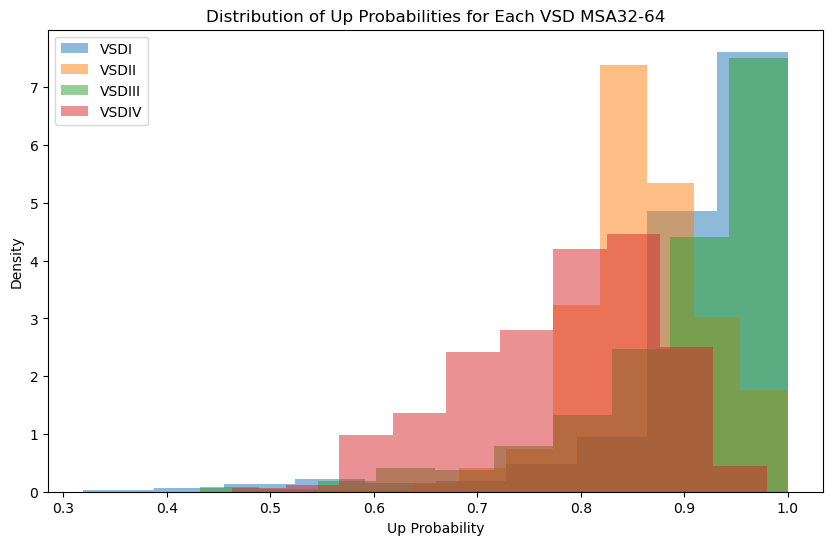

In [35]:
import matplotlib.pyplot as plt

# Plotting the distributions for each VSD in a semi-transparent style
plt.figure(figsize=(10, 6))

# Plot distributions with semi-transparency for each VSD
plt.hist(up_prob_df["VSDI_up_prob"], bins=10, alpha=0.5, label="VSDI", density=True)
plt.hist(up_prob_df["VSDII_up_prob"], bins=10, alpha=0.5, label="VSDII", density=True)
plt.hist(up_prob_df["VSDIII_up_prob"], bins=10, alpha=0.5, label="VSDIII", density=True)
plt.hist(up_prob_df["VSDIV_up_prob"], bins=10, alpha=0.5, label="VSDIV", density=True)

# Adding labels and title
plt.xlabel("Up Probability")
plt.ylabel("Density")
plt.title("Distribution of Up Probabilities for Each VSD MSA32-64")
plt.legend()

# Show the plot
plt.show()


In [36]:
def find_most_probable_down_models(df):
    """
    Orders all models by the lowest total up probabilities across all VSDs.

    Parameters:
    - df (DataFrame): The dataframe containing the model up probabilities.

    Returns:
    - DataFrame: A dataframe of all models ordered by total up probabilities.
    """
    # Calculate the sum of up probabilities for each model across all VSDs
    df['total_up_probability'] = df[['VSDI_up_prob', 'VSDII_up_prob', 'VSDIII_up_prob', 'VSDIV_up_prob']].sum(axis=1)
    
    # Sort the dataframe by the total_up_probability in ascending order
    ordered_models = df.sort_values(by='total_up_probability').reset_index(drop=True)
    
    # Drop the 'total_up_probability' column after sorting
    ordered_models = ordered_models.drop(columns=['total_up_probability'])
    
    return ordered_models


In [37]:
ordered_models = find_most_probable_down_models(up_prob_df)
ordered_models.iloc[600:651]

,pdb_file,VSDI_up_prob,VSDII_up_prob,VSDIII_up_prob,VSDIV_up_prob
600,model_5_ptm_r12_seed0.pdb,0.973130,0.868147,0.972705,0.841967
601,model_5_ptm_r5_seed5.pdb,0.947115,0.866271,0.980344,0.862361
602,model_1_ptm_r7_seed7.pdb,0.969697,0.817154,0.976658,0.893045
603,model_1_ptm_r9_seed6.pdb,0.870854,0.846903,0.981120,0.957737
604,model_2_ptm_r12_seed7.pdb,0.970717,0.913352,0.969438,0.803513
605,model_4_ptm_r5_seed0.pdb,0.926761,0.877339,0.994417,0.859499
606,model_5_ptm_r12_seed5.pdb,0.938703,0.894035,0.984117,0.842894
607,model_1_ptm_r6_seed8.pdb,0.995611,0.825789,0.968637,0.873164
608,model_2_ptm_r9_seed6.pdb,0.973094,0.864997,0.983374,0.843689
609,model_5_ptm_r12_seed3.pdb,0.940925,0.898208,0.998737,0.828852


In [6]:
#quality_df = pd.read_csv("/Users/adrianahernandezgonzalez/Documents/YarovLab/repositories/stateAnalysis/ModelQualityAssesment/model_quality_metrics_16.csv")
#quality_df

In [7]:
#merged_df = ordered_models.merge(quality_df, left_on="pdb_file", right_on="Filename", how="left")
#merged_df

In [38]:
import pandas as pd

def organize_by_distance(df, distance_column):
    """
    Organizes the dataframe by a specified distance column in ascending order.

    Parameters:
    - df (DataFrame): The dataframe to organize.
    - distance_column (str): The column name representing the distance to sort by.

    Returns:
    - DataFrame: The dataframe ordered by the specified distance column.
    """
    # Sort the dataframe by the specified distance column in ascending order
    organized_df = df.sort_values(by=distance_column).reset_index(drop=True)
    return organized_df

# Example usage:
organized_df = organize_by_distance(df_32_64, "CA_ARG509_CA-PHE456_CA")
print(organized_df)


                     pdb_file  shortest_ARG126-GLU52  shortest_ARG126-PHE59  \
0    model_1_ptm_r0_seed9.pdb                    3.4                   14.0   
1    model_1_ptm_r0_seed1.pdb                    2.6                   13.9   
2    model_2_ptm_r0_seed9.pdb                    3.3                   13.7   
3    model_1_ptm_r0_seed2.pdb                    2.2                   12.9   
4    model_3_ptm_r2_seed4.pdb                    2.6                   12.8   
..                        ...                    ...                    ...   
645  model_3_ptm_r1_seed1.pdb                    4.2                   13.7   
646  model_1_ptm_r0_seed8.pdb                    3.4                   15.0   
647  model_5_ptm_r0_seed9.pdb                    2.2                   12.4   
648  model_1_ptm_r1_seed3.pdb                    4.0                   15.4   
649  model_1_ptm_r0_seed4.pdb                    2.9                   14.0   

     shortest_ARG126-GLU62  shortest_ARG129-GLU52  

In [43]:
organized_df.iloc[1:31]#["CA_ARG509_CA-PHE456_CA"]

,pdb_file,shortest_ARG126-GLU52,shortest_ARG126-PHE59,shortest_ARG126-GLU62,shortest_ARG129-GLU52,shortest_ARG129-PHE59,shortest_ARG129-GLU62,shortest_ARG132-GLU52,shortest_ARG132-PHE59,shortest_ARG132-GLU62,...,CA_GLU252_CA-GLU1353_CA,CA_GLU595_CA-GLU1024_CA,CA_GLU595_CA-GLU1353_CA,CA_GLU1024_CA-GLU1353_CA,CA_LEU290_CA-LEU638_CA,CA_LEU290_CA-VAL1071_CA,CA_LEU290_CA-ILE1402_CA,CA_LEU638_CA-VAL1071_CA,CA_LEU638_CA-ILE1402_CA,CA_ILE1402_CA-VAL1071_CA
1,model_1_ptm_r0_seed1.pdb,2.6,13.9,18.9,5.1,6.8,11.1,12.8,3.0,4.1,...,16.72,22.44,24.81,15.27,15.36,9.81,26.77,9.44,33.63,24.71
2,model_2_ptm_r0_seed9.pdb,3.3,13.7,18.5,7.1,6.9,10.6,14.4,4.5,3.5,...,57.86,19.81,44.38,27.26,12.53,40.43,50.97,31.84,40.28,15.23
3,model_1_ptm_r0_seed2.pdb,2.2,12.9,17.9,5.9,6.1,10.3,13.0,4.2,4.2,...,4.15,9.01,8.39,7.90,13.49,8.31,6.00,7.82,14.61,9.77
4,model_3_ptm_r2_seed4.pdb,2.6,12.8,17.4,4.8,8.2,12.4,10.7,2.7,6.0,...,7.28,6.59,9.74,7.16,8.12,11.71,11.63,8.92,13.42,7.47
5,model_5_ptm_r1_seed0.pdb,2.1,11.9,16.3,5.5,7.6,11.5,11.8,2.8,4.8,...,7.06,6.61,9.62,7.36,8.68,12.13,11.48,8.88,13.30,7.56
6,model_2_ptm_r0_seed8.pdb,2.6,14.5,18.6,5.1,7.9,11.3,14.8,3.2,2.4,...,32.92,9.83,12.47,7.66,16.22,21.96,24.11,16.26,26.39,14.03
7,model_1_ptm_r0_seed0.pdb,3.5,14.7,19.0,5.2,8.8,11.5,11.3,3.4,4.7,...,25.61,41.38,29.30,15.09,11.15,21.97,17.93,16.84,6.95,15.47
8,model_5_ptm_r0_seed0.pdb,1.0,11.6,17.1,6.6,6.2,10.6,14.0,3.2,3.4,...,7.79,7.88,10.94,7.05,10.50,15.24,13.80,10.86,14.97,8.01
9,model_5_ptm_r12_seed7.pdb,3.5,13.7,17.9,4.9,8.9,12.7,10.0,3.0,6.5,...,6.99,6.48,9.34,6.89,8.69,12.15,11.83,8.96,13.83,8.23
10,model_1_ptm_r0_seed3.pdb,2.8,14.1,18.7,5.1,6.9,10.8,12.3,3.5,5.0,...,36.52,28.44,34.88,40.80,11.09,7.90,13.70,18.79,16.60,18.18


In [40]:
df_32_64

,pdb_file,shortest_ARG126-GLU52,shortest_ARG126-PHE59,shortest_ARG126-GLU62,shortest_ARG129-GLU52,shortest_ARG129-PHE59,shortest_ARG129-GLU62,shortest_ARG132-GLU52,shortest_ARG132-PHE59,shortest_ARG132-GLU62,...,CA_GLU252_CA-GLU1353_CA,CA_GLU595_CA-GLU1024_CA,CA_GLU595_CA-GLU1353_CA,CA_GLU1024_CA-GLU1353_CA,CA_LEU290_CA-LEU638_CA,CA_LEU290_CA-VAL1071_CA,CA_LEU290_CA-ILE1402_CA,CA_LEU638_CA-VAL1071_CA,CA_LEU638_CA-ILE1402_CA,CA_ILE1402_CA-VAL1071_CA
0,model_2_ptm_r3_seed1.pdb,4.0,14.7,19.3,4.7,7.9,12.3,11.6,2.7,5.2,...,7.23,6.63,9.84,7.26,8.72,12.52,11.93,8.93,13.35,7.54
1,model_3_ptm_r4_seed7.pdb,4.0,14.6,18.8,4.5,9.9,13.5,9.6,3.1,6.9,...,7.08,6.65,9.63,7.10,8.05,11.56,10.67,9.39,13.26,7.06
2,model_4_ptm_r1_seed6.pdb,3.6,13.6,18.2,5.8,6.5,10.6,12.3,3.1,4.2,...,7.66,7.22,9.84,6.71,8.94,11.99,11.29,9.27,13.96,7.96
3,model_5_ptm_r6_seed0.pdb,3.4,13.4,17.5,5.8,7.9,11.7,11.6,2.8,5.0,...,6.87,6.59,9.26,7.00,8.78,12.41,11.82,9.18,13.64,7.49
4,model_5_ptm_r11_seed2.pdb,3.1,13.3,17.7,3.7,8.7,12.3,8.7,2.9,6.2,...,6.96,6.58,9.19,6.84,8.51,11.80,11.73,8.98,13.77,7.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,model_4_ptm_r2_seed3.pdb,5.0,15.3,19.5,4.9,9.4,13.3,9.5,3.2,6.9,...,7.19,6.83,9.53,6.82,8.01,11.30,12.80,8.58,14.37,8.91
646,model_5_ptm_r5_seed5.pdb,2.7,13.7,18.2,4.8,9.5,13.3,10.0,3.2,6.6,...,7.11,6.50,9.29,6.78,8.76,13.11,12.37,9.75,14.29,8.54
647,model_3_ptm_r9_seed9.pdb,3.1,13.7,18.3,4.5,9.3,13.3,9.5,2.8,6.6,...,7.36,6.64,9.58,6.97,8.35,12.09,11.99,9.07,13.47,7.00
648,model_1_ptm_r12_seed2.pdb,3.2,13.9,18.2,4.4,8.9,13.0,9.9,2.2,6.4,...,7.00,6.50,9.54,7.04,8.88,12.40,12.08,9.27,13.84,7.21


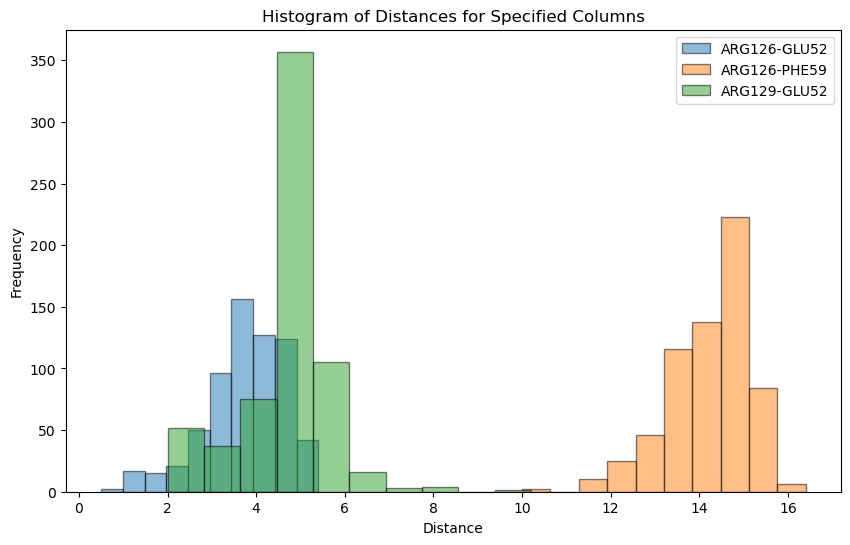

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_multiple_distances_histogram(df, distance_dict, bins=10, alpha=0.5):
    """
    Plots histograms of distances for specified columns in the dataframe with given aliases.

    Parameters:
    - df (DataFrame): The dataframe containing the distances.
    - distance_dict (dict): A dictionary where keys are aliases, and values are column names.
    - bins (int): Number of bins for the histogram (default is 10).
    - alpha (float): Transparency level for the histogram plots (default is 0.5).
    """
    plt.figure(figsize=(10, 6))
    
    # Loop through each item in the dictionary and plot the histogram for each distance column
    for alias, column_name in distance_dict.items():
        if column_name in df.columns:
            plt.hist(df[column_name], bins=bins, alpha=alpha, label=alias, edgecolor='black')
        else:
            print(f"Warning: Column '{column_name}' not found in the dataframe.")

    # Set plot labels and title
    plt.xlabel("Distance")
    plt.ylabel("Frequency")
    plt.title("Histogram of Distances for Specified Columns")
    plt.legend()
    plt.show()

# Example usage:
# Assuming df is your DataFrame with distance columns
distance_dict = {
    "ARG126-GLU52": "shortest_ARG126-GLU52",
    "ARG126-PHE59": "shortest_ARG126-PHE59",
    "ARG129-GLU52": "shortest_ARG129-GLU52"
}

# Plot the histograms
# plot_multiple_distances_histogram(df, distance_dict)
plot_multiple_distances_histogram(df_32_64, distance_dict, bins=10, alpha=0.5)